# 多项式回归

**多项式回归**是一种用于建模数据非线性关系的回归分析方法，是线性回归的扩展。它通过将输入特征转化为多项式特征来增强模型的拟合能力，能够拟合非线性数据。

## 数学表达式
多项式回归的数学表达式为：
$$y = \beta_0 + \beta_1 x + \beta_2 x^2 + \dots + \beta_n x^n + \epsilon$$

其中，
- $n$是多项式次数，
- $\beta$是系数，
- $\epsilon$是误差项。

## 多项式回归的优缺点
- **优点**：
    - 简单有效：利用线性回归框架处理非线性问题。
    - 灵活性：通过调整多项式次数控制模型复杂度。
- **缺点**：
    - 过拟合风险：高次多项式可能过度拟合噪声（如用10次多项式拟合少量数据）。
    - 多重共线性：高次项间高度相关，影响系数稳定性。
    - 可解释性：高次项的实际含义可能不直观。

# 多项式回归案例

## PolynomialFeatures：生成多项式特征，包括交互项与次方项
  - **degree**：指定生成多项式特征的最大阶数
  - **include_bias**：是否包含偏置项  

## 加州住房数据集
**California housing dataset（加州住房数据集）**数据集是一个回归数据集，数据集的目标是根据一系列地区特征（如人口、房间数、收入等）来预测加州地区的住房价格。

- MedHouseVal：住房价格（单位：10万）
- MedInc：家庭收入（单位：万）
- HouseAge：房屋年龄（单位：年）
- AveRooms：平均房间数
- AveBedrms：平均卧室数
- Population：人口
- AveOccup：平均家庭人口
- Latitude：纬度
- Longitude：经度

In [5]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 加载加利福尼亚房价数据集
df = fetch_california_housing(as_frame=True).frame # as_frame设置为True确保下载的数据格式为DataFrame
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


## 实际案例

多项式回归公式: y = 192.64
 + (-11.34) * MedInc
 + (-0.83) * HouseAge
 + (6.74) * AveRooms
 + (-32.90) * AveBedrms
 + (0.00) * Population
 + (1.59) * AveOccup
 + (8.62) * Latitude
 + (5.66) * Longitude
 + (-0.03) * MedInc^2
 + (0.00) * MedInc HouseAge
 + (0.04) * MedInc AveRooms
 + (-0.17) * MedInc AveBedrms
 + (0.00) * MedInc Population
 + (-0.00) * MedInc AveOccup
 + (-0.16) * MedInc Latitude
 + (-0.15) * MedInc Longitude
 + (0.00) * HouseAge^2
 + (-0.00) * HouseAge AveRooms
 + (0.01) * HouseAge AveBedrms
 + (0.00) * HouseAge Population
 + (-0.00) * HouseAge AveOccup
 + (-0.01) * HouseAge Latitude
 + (-0.01) * HouseAge Longitude
 + (0.01) * AveRooms^2
 + (-0.08) * AveRooms AveBedrms
 + (-0.00) * AveRooms Population
 + (0.02) * AveRooms AveOccup
 + (0.09) * AveRooms Latitude
 + (0.09) * AveRooms Longitude
 + (0.19) * AveBedrms^2
 + (0.00) * AveBedrms Population
 + (-0.11) * AveBedrms AveOccup
 + (-0.46) * AveBedrms Latitude
 + (-0.42) * AveBedrms Longitude
 + (0.00) * Population^2
 + (0.00) 

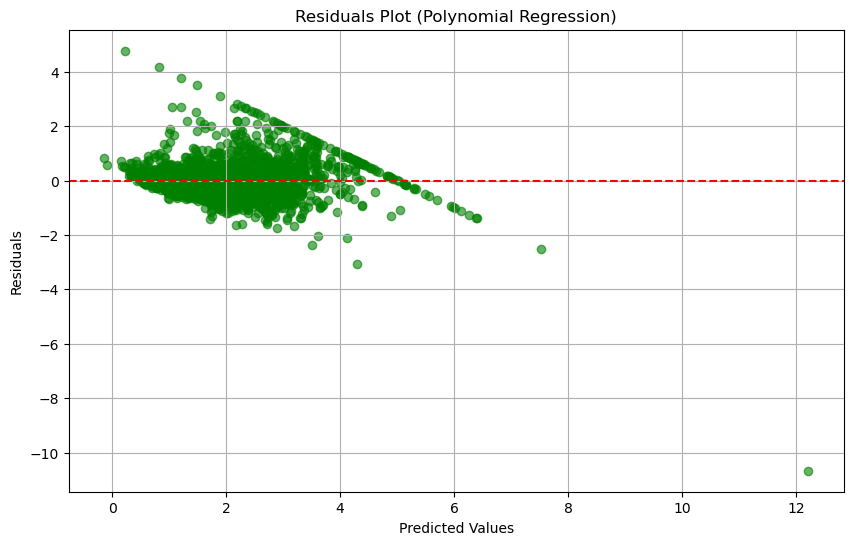

In [6]:
# 导入所需的库
import numpy as np  # 用于数值计算，尤其是数组操作
import pandas as pd  # 用于数据处理和分析，特别是表格数据
import matplotlib.pyplot as plt  # 用于绘制图形
from sklearn.model_selection import train_test_split  # 用于将数据分割为训练集和测试集
from sklearn.preprocessing import PolynomialFeatures  # 用于生成多项式特征
from sklearn.linear_model import LinearRegression  # 用于创建线性回归模型
from sklearn.metrics import mean_squared_error, r2_score  # 用于计算回归模型的评估指标（MSE, RMSE, R²）

# 准备数据：自变量（特征）和因变量（目标）
X = df.drop(columns=['MedHouseVal'])  # 删除目标变量（'MedHouseVal'），剩下的列为自变量
y = df['MedHouseVal']  # 目标变量：房屋中位数价值（MedHouseVal）

# 分割数据集：将数据分为训练集和验证集，比例为 90% 训练集，10% 验证集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)  # 这里的 random_state 是为了保证每次分割的结果相同

# 生成多项式特征：将原始特征转换为二次多项式特征
degree = 2  # 设置多项式的阶数为2（二次多项式）
poly = PolynomialFeatures(degree=degree, include_bias=False)  # 创建 PolynomialFeatures 对象，不包含偏置项（偏置项在LinearRegression()中计算）
X_train_poly = poly.fit_transform(X_train)  # 对训练集进行多项式特征学习与转换
X_test_poly = poly.transform(X_test)  # 对验证 集进行多项式特征转换

# 训练线性回归模型
model = LinearRegression()  # 创建线性回归模型
model.fit(X_train_poly, y_train)  # 用训练集的多项式特征训练线性回归模型

# 获取回归系数和特征名称
coefficients = model.coef_  # 模型的回归系数（每个特征的权重）
intercept = model.intercept_  # 模型的截距（偏置项）
feature_names = poly.get_feature_names_out(X.columns)  # 获取多项式特征的名称

# 输出回归公式
print("多项式回归公式: y = {:.2f}".format(intercept))  # 输出回归公式中的截距项
# 输出每个特征的系数和名称
for i, name in enumerate(feature_names):
    print(f" + ({coefficients[i]:.2f}) * {name}")  # 输出每个特征的系数

# 使用训练好的模型进行预测
y_pred = model.predict(X_test_poly)  # 用训练好的模型对测试集进行预测

# 计算评估指标
mse = mean_squared_error(y_test, y_pred)  # 计算均方误差 (MSE)
rmse = np.sqrt(mse)  # 计算均方根误差 (RMSE)
r2 = r2_score(y_test, y_pred)  # 计算决定系数 (R²)，衡量模型的拟合度

# 输出评估指标
print("\n评估指标:")
print(f"MSE: {mse:.2f}")  # 输出均方误差
print(f"RMSE: {rmse:.2f}")  # 输出均方根误差
print(f"R²: {r2:.2f}")  # 输出决定系数

# 可视化1：残差图
residuals = y_test - y_pred  # 残差 = 实际值 - 预测值
plt.figure(figsize=(10, 6))  # 设置图表大小
plt.scatter(y_pred, residuals, alpha=0.6, color='green')  # 绘制预测值与残差的散点图
plt.axhline(y=0, color='r', linestyle='--')  # 绘制一条红色虚线，表示残差为0的位置
plt.title("Residuals Plot (Polynomial Regression)")  # 设置残差图标题
plt.xlabel("Predicted Values")  # 设置x轴标签
plt.ylabel("Residuals")  # 设置y轴标签
plt.grid(True)  # 添加网格线
plt.show()  # 显示图表

1. **整体拟合效果良好**  
- **现象**：  
    - 残差点（绿色）**密集分布在零线（红色虚线）附近**，尤其预测值0-6区间残差范围集中在-2到+2之间，且无明显规律性偏移。  
    - 数据点在零线上下**随机散布**，未出现U型、喇叭形或分段聚集趋势，符合理想残差图的特征。  
- **结论**：  
    - 多项式回归模型**成功捕捉了数据中的主要非线性关系**，整体拟合效果较好，未遗漏全局性趋势（如二次、三次项可能已覆盖数据模式）。  

2. **高预测值区间的外推风险**  
- **现象**：  
    - 预测值6-12区间数据点稀疏，但残差波动显著增大（如预测值>8时残差低至-10），且分布分散。  
    - 预测值0-6区间残差集中（范围-4到+2），而6-12区间残差范围扩大至-10到+4，呈现明显对比。  
- **结论**：  
    - **外推能力受限**：模型在训练数据密集区（0-6）表现稳定，但对高预测值区（>6）预测可靠性下降，可能因多项式项的阶数不足或高值区间样本量过少。  
    - **潜在过拟合或欠拟合**：若高阶多项式项未覆盖真实复杂模式，可能导致高值区残差剧烈波动（如预测值>10时残差急剧下降）。  

3. **轻度异方差性与离群值**  
- **现象**：  
    - 预测值0-6区间残差方差较小（±4），而高值区（6-12）残差方差显著扩大（±10），但未形成严格漏斗形，仅因数据稀疏性导致离散。  
    - 预测值>8时存在极端负残差（如-10），偏离主体分布，但数量极少（可能为单一样本）。  
- **结论**：  
    - **局部异方差性**：残差方差随预测值增大而上升，可能因模型对高值区间的非线性响应拟合不足，或数据本身存在异质性（如高值区噪声更大）。  
    - **离群值需警惕**：极端负残差可能反映数据采集异常（如传感器故障、人工录入错误）或特殊场景（如突变事件），需结合业务背景核查对应样本。  

4. **多项式阶数合理性验证**  
- **现象**：  
    - 残差在预测值0-6区间无系统性偏差，说明当前多项式阶数（如二次、三次）已足够拟合该区域趋势。  
    - 高值区（6-12）残差剧烈波动可能提示：① 阶数不足（如真实关系为更高阶多项式），② 外推区间无有效训练数据支持，模型无法学习有效规律。 
- **结论**：  
    - **当前阶数适用于主数据区间**：模型在预测值0-6的表现支持现有复杂度选择。  
    - **高值区需单独优化**：若业务需求集中在高预测值区间，可尝试增加多项式阶数或引入分段回归策略。  

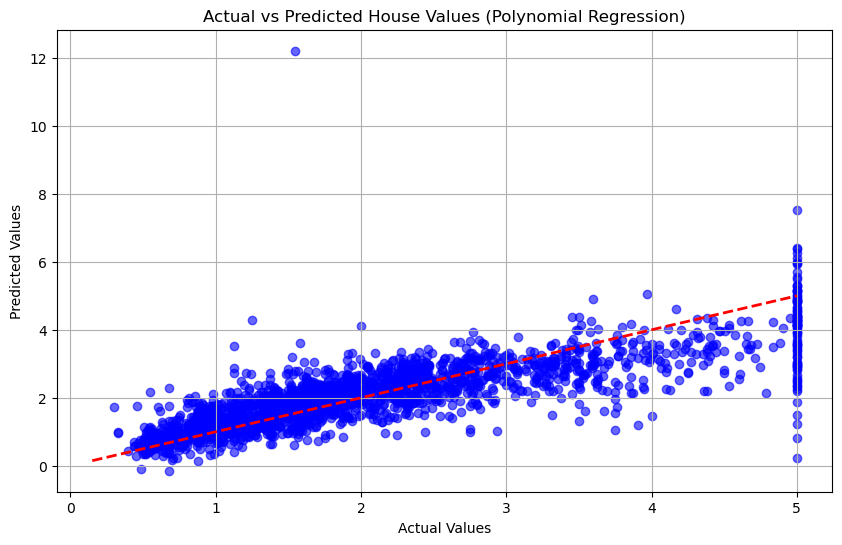

In [7]:
# 可视化2：实际值 vs 预测值（散点图）
plt.figure(figsize=(10, 6))  # 设置图表大小（宽10英寸，高6英寸）
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')  # 绘制实际值与预测值的散点图
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)  # 绘制理想情况下的红色对角线（理想值与预测值相同）
plt.title("Actual vs Predicted House Values (Polynomial Regression)")  # 设置图表标题
plt.xlabel("Actual Values")  # 设置x轴标签
plt.ylabel("Predicted Values")  # 设置y轴标签
plt.grid(True)  # 添加网格线，便于查看
plt.show()  # 显示图表

1. **模型整体表现与数据分布**  
- **现象**：  
    - 数据点（蓝色）**密集分布在红色虚线（理想线）附近**，表明模型对中价值房屋（Actual 1-4）的预测基本合理。  
    - **实际值上限为5**，但预测值纵轴延伸至12，远超实际值范围，暗示模型对部分样本存在**严重高估**（如Actual=5时Predicted≈12）。 
- **结论**：  
    - 模型在中价值区间（Actual 1-4）捕捉了核心趋势（如面积、地段等特征的非线性关系），但**外推能力不足**，高价值房屋（Actual≥4）预测失控。  

2. **低价值区间异常预测**  
- **现象**：  
    - 实际值=0-1区间存在**负值预测**（Predicted≈-1到0），违背房屋价值非负的物理逻辑。  
    - 实际值=5时预测值跨度极大（Predicted≈0-8），暴露模型对高价值房预测的不稳定性。  
- **结论**：  
    - 负值预测反映模型**未约束输出范围**，可能因多项式回归高阶项导致预测值震荡。  
    - 高价值房预测高方差（跨度达8个单位）提示**过拟合噪声**或异常特征干扰（如极端房龄、破损率）。  

3. **外推风险与数据稀疏性**  
- **现象**：  
    - 实际值>4的样本预测值急剧上升（如Actual=5→Predicted≈），远超业务合理范围。  
    - 预测值>8的区域数据点稀疏，呈现“孤岛式离散”，缺乏实际值支撑。  
- **结论**：  
    - 模型对高价值区间（Actual≥4）**依赖数学外推**而非数据驱动规律，导致预测失真。  
    - 训练数据中高价房样本（Actual≥4）可能不足或特征表达不充分（如未包含稀缺性指标）。  